In [3]:
from numpy import *
from pandas import *
from time import sleep
from svm_basic import SVM

def loadDataSet(fileName):
    dataMat = []; labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = line.strip().split(',')
        dataMat.append([float(lineArr[0]), float(lineArr[1])])
        labelMat.append(float(lineArr[2]))
    return dataMat,labelMat

def loadDataFrame(fileName):
    df = read_csv(fileName)
    df.columns = ["x1", "x2", "c"]
    return df

In [4]:
dataArr, labelArr = loadDataSet('linearly_separable.csv')
dataFrame = loadDataFrame('linearly_separable.csv')

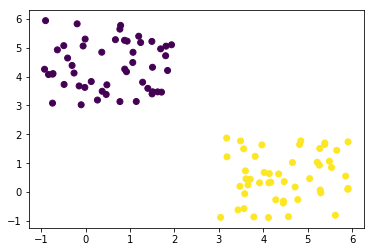

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
plt.scatter(dataFrame['x1'],dataFrame['x2'],marker='o',c=dataFrame['c'])

In [12]:
clf = SVM()
w,b=clf.fit(dataArr,labelArr)
hypotheses = clf.predict(dataArr)

In [16]:
from sklearn.metrics import accuracy_score

print("Accuracy Score: ",accuracy_score(labelArr, hypotheses))

Accuracy Score:  1.0


In [7]:
def plot_graph(dataArr):
        colors = {1:'r',-1:'b'}
        fig = plt.figure()
        ax = fig.add_subplot(1,1,1)
        max_feature_value=float('-inf')
        min_feature_value=float('+inf')
        for yi in range(len(dataArr)):
            if np.amax(dataArr[yi])>max_feature_value:
                max_feature_value=np.amax(dataArr[yi])
                
            if np.amin(dataArr[yi])<min_feature_value:
                min_feature_value=np.amin(dataArr[yi])
        
        plt.scatter(dataFrame['x1'],dataFrame['x2'],marker='o',c=dataFrame['c'])
        def hyperplane_value(x,w,b,v):
            return (-w[0]*x-b+v) / w[1]
        datarange = (min_feature_value*0.9,max_feature_value*1.)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]
        db1 = hyperplane_value(hyp_x_min, w, b, 0)
        db2 = hyperplane_value(hyp_x_max, w, b, 0)
        ax.plot([hyp_x_min,hyp_x_max],[db1.item(0,0),db2.item(0,0)], 'r--')

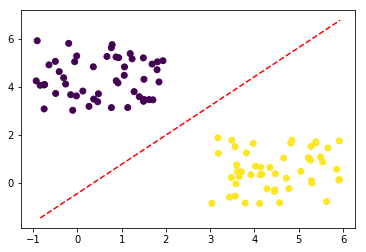

In [8]:
plot_graph(dataArr)